# 113-2 統計下期末專題

## 前處理

In [6]:
import pandas as pd

# 讀取 A1 與 A2 資料
a1 = pd.read_csv("data/A1.csv")
a2 = pd.read_csv("data/A2_1.csv")

a1.head()
a2.head()

C:\Users\yuanr\AppData\Local\Temp\ipykernel_55484\22268230.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  a2 = pd.read_csv("data/A2_1.csv")


,發生年度,發生月份,發生日期,發生時間,事故類別名稱,處理單位名稱警局層,發生地點,天候名稱,光線名稱,道路類別-第1當事者-名稱,...,當事者行動狀態子類別名稱,車輛撞擊部位大類別名稱-最初,車輛撞擊部位子類別名稱-最初,車輛撞擊部位大類別名稱-其他,車輛撞擊部位子類別名稱-其他,肇因研判大類別名稱-個別,肇因研判子類別名稱-個別,肇事逃逸類別名稱-是否肇逃,經度,緯度
0,2023,1.0,20230101.0,200.0,A2,臺中市政府警察局,臺中市后里區月眉東路一段前0.0公尺,晴,夜間(或隧道、地下道、涵洞)有照明,其他,...,向前直行中,機車,前車頭,NaN,NaN,駕駛人,未注意車前狀態,否,120.688213,24.317256
1,2023,1.0,20230101.0,200.0,A2,臺中市政府警察局,臺中市后里區月眉東路一段前0.0公尺,晴,夜間(或隧道、地下道、涵洞)有照明,其他,...,等待(引擎未熄火),汽車,左後車尾(身),NaN,NaN,無(車輛駕駛人因素),尚未發現肇事因素,否,120.688213,24.317256
2,2023,1.0,20230101.0,200.0,A2,臺中市政府警察局,臺中市后里區月眉東路一段前0.0公尺,晴,夜間(或隧道、地下道、涵洞)有照明,其他,...,其他,其他,非汽(機)車,NaN,NaN,無(非車輛駕駛人因素),尚未發現肇事因素,否,120.688213,24.317256
3,2023,1.0,20230101.0,400.0,A2,高雄市政府警察局,高雄市苓雅區福安路 / 高雄市苓雅區福安路,晴,夜間(或隧道、地下道、涵洞)有照明,市區道路,...,向前直行中,機車,前車頭,機車,前車頭,駕駛人,未依規定讓車,否,120.325763,22.628094
4,2023,1.0,20230101.0,400.0,A2,高雄市政府警察局,高雄市苓雅區福安路 / 高雄市苓雅區福安路,晴,夜間(或隧道、地下道、涵洞)有照明,市區道路,...,向前直行中,汽車,左前車頭(身),汽車,左前車頭(身),駕駛人,未依規定減速,否,120.325763,22.628094


In [7]:
# 統一欄位：A1 的死亡受傷人數標成 1（嚴重事故），A2 標成 0（輕微事故）
a1["事故嚴重程度"] = 1
a2["事故嚴重程度"] = 0

# 串接資料
df = pd.concat([a1, a2], ignore_index=True)
print(len(df))

84319


In [8]:
# 統一 A1, A2 光線欄位
a1["夜間(或隧道、地下道、涵洞)無照明"] = "夜間無照明"
a1["夜間(或隧道、地下道、涵洞)有照明"] = "夜間有照明"
a1["日間自然光線"] = "日間有照明"
a1["晨或暮光"] = "日間自然光"

a2["有照明且開啟"] = ""
a2["有照明未開啟或故障"] = ""
a2["無照明"] = ""

In [9]:
# 移除缺失值過多的欄位（>50% 缺失）與含有 NA 的列
# 在這裡是把一些「當事者」是動物的刪掉
threshold = 0.5
missing_ratio = df.isnull().mean()
df = df.drop(columns=missing_ratio[missing_ratio > threshold].index)
df = df.dropna()
print(len(df))

79380


In [10]:
# 刪除不研究欄位
drop_cols = [
    "發生月份", "發生日期", "發生時間", "發生年度", "事故類別名稱", "處理單位名稱警局層", 
    "當事者順位", "肇事逃逸類別名稱-是否肇逃", 
    "經度", "緯度"
]
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# 合併大類別與子類別欄位（用 - 連接）
combine_cols = {
    "道路型態": ["道路型態大類別名稱", "道路型態子類別名稱"],
    "事故位置": ["事故位置大類別名稱", "事故位置子類別名稱"],
    "路面狀況": ["路面狀況-路面鋪裝名稱", "路面狀況-路面狀態名稱"],
    "道路障礙": ["道路障礙-視距品質名稱", "道路障礙-視距名稱"],
    "號誌": ["號誌-號誌種類名稱", "號誌-號誌動作名稱"],
    "車道分向設施": ["車道劃分設施-分向設施大類別名稱", "車道劃分設施-分向設施子類別名稱"],
    "車道分道設施": ["車道劃分設施-分道設施-快車道或一般車道間名稱", "車道劃分設施-分道設施-快慢車道間名稱"],
    "事故型態": ["事故類型及型態大類別名稱", "事故類型及型態子類別名稱"],
    "肇因研判": ["肇因研判大類別名稱-主要", "肇因研判子類別名稱-主要"],
    "當事者區分": ["當事者區分-類別-大類別名稱-車種", "當事者區分-類別-子類別名稱-車種"],
    "當事者行動狀態": ["當事者行動狀態大類別名稱", "當事者行動狀態子類別名稱"],
    "車輛撞擊部位": ["車輛撞擊部位大類別名稱-最初", "車輛撞擊部位子類別名稱-最初"]
}
for new_col, (col1, col2) in combine_cols.items():
    df[new_col] = df[col1] + "-" + df[col2]
df = df.drop(columns=sum(combine_cols.values(), []))  # 刪除原始欄位

# 分離「死亡受傷人數」欄位 → 新增是否死亡欄位與死亡率
df[["死亡人數", "受傷人數"]] = df["死亡受傷人數"].str.extract(r"死亡(\d+);受傷(\d+)")
df[["死亡人數", "受傷人數"]] = df[["死亡人數", "受傷人數"]].astype(int)
df["是否死亡"] = (df["死亡人數"] > 0).astype(int)
df["死亡率"] = df["死亡人數"] / (df["死亡人數"] + df["受傷人數"] + 1e-6)
df = df.drop(columns=["死亡受傷人數"])

# 將出現次數 < 100 的類別視為 "其他"
threshold = 100
for col in df.select_dtypes(include='object'):
    freq = df[col].value_counts()
    to_replace = freq[freq < threshold].index
    df[col] = df[col].replace(to_replace, "其他")

# 加入虛擬變數（排除年齡欄位）
dummy_exclude = ["當事者事故發生時年齡"]
df = pd.get_dummies(df, columns=[col for col in df.select_dtypes(include='object') if col not in dummy_exclude], drop_first=True)

# Pearson correlation 檢查變數間的線性相依
#correlation_matrix = df.corr(numeric_only=True)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Correlation Matrix", dataframe=correlation_matrix)




/Users/bowen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bowen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 29983 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bowen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bowen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bowen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bowen/opt/anaconda3/lib/python3.9/site-packages/matplotlib

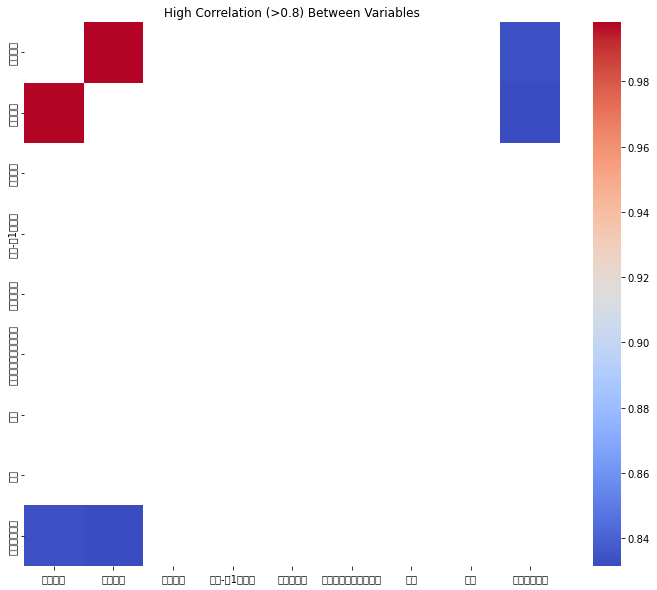

In [ ]:
# 試畫

import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr > 0.8) & (corr < 1)], cmap="coolwarm", annot=False)
plt.title("High Correlation (>0.8) Between Variables")
plt.show()

In [ ]:
df.head()

,發生月份,速限-第1當事者,當事者事故發生時年齡,事故嚴重程度,死亡人數,受傷人數,是否死亡,死亡率,發生年度_2023,事故類別名稱_A2,...,車輛撞擊部位_機車與自行車-右側車身,車輛撞擊部位_機車與自行車-左側車身,車輛撞擊部位_汽車-前車頭,車輛撞擊部位_汽車-右側車身,車輛撞擊部位_汽車-右前車頭(身),車輛撞擊部位_汽車-右後車尾(身),車輛撞擊部位_汽車-左側車身,車輛撞擊部位_汽車-左前車頭(身),車輛撞擊部位_汽車-左後車尾(身),車輛撞擊部位_汽車-後車尾
0,1.0,50.0,44.0,1,1,0,1,0.999999,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,50.0,20.0,1,3,2,1,0.600000,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1.0,50.0,19.0,1,3,2,1,0.600000,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,50.0,22.0,1,3,2,1,0.600000,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1.0,50.0,17.0,1,3,2,1,0.600000,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.tail()

,速限-第1當事者,當事者事故發生時年齡,事故嚴重程度,死亡人數,受傷人數,是否死亡,死亡率,天候名稱_晴,天候名稱_陰,天候名稱_雨,...,車輛撞擊部位_機車與自行車-右側車身,車輛撞擊部位_機車與自行車-左側車身,車輛撞擊部位_汽車-前車頭,車輛撞擊部位_汽車-右側車身,車輛撞擊部位_汽車-右前車頭(身),車輛撞擊部位_汽車-右後車尾(身),車輛撞擊部位_汽車-左側車身,車輛撞擊部位_汽車-左前車頭(身),車輛撞擊部位_汽車-左後車尾(身),車輛撞擊部位_汽車-後車尾
84311,50.0,32.0,0,0,1,0,0.0,True,False,False,...,False,False,False,True,False,False,False,False,False,False
84312,50.0,29.0,0,0,1,0,0.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
84314,50.0,26.0,0,0,1,0,0.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
84315,50.0,38.0,0,0,1,0,0.0,True,False,False,...,False,False,True,False,False,False,False,False,False,False
84316,50.0,51.0,0,0,1,0,0.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.count()

發生月份                 79380
速限-第1當事者             79380
當事者事故發生時年齡           79380
事故嚴重程度               79380
死亡人數                 79380
                     ...  
車輛撞擊部位_汽車-右後車尾(身)    79380
車輛撞擊部位_汽車-左側車身       79380
車輛撞擊部位_汽車-左前車頭(身)    79380
車輛撞擊部位_汽車-左後車尾(身)    79380
車輛撞擊部位_汽車-後車尾        79380
Length: 271, dtype: int64

In [ ]:
df.describe(include='all')

,發生月份,速限-第1當事者,當事者事故發生時年齡,事故嚴重程度,死亡人數,受傷人數,是否死亡,死亡率,發生年度_2023,事故類別名稱_A2,...,車輛撞擊部位_機車與自行車-右側車身,車輛撞擊部位_機車與自行車-左側車身,車輛撞擊部位_汽車-前車頭,車輛撞擊部位_汽車-右側車身,車輛撞擊部位_汽車-右前車頭(身),車輛撞擊部位_汽車-右後車尾(身),車輛撞擊部位_汽車-左側車身,車輛撞擊部位_汽車-左前車頭(身),車輛撞擊部位_汽車-左後車尾(身),車輛撞擊部位_汽車-後車尾
count,79380.000000,79380.000000,79380.000000,79380.000000,79380.000000,79380.000000,79380.000000,79380.000000,79380.000000,79380.000000,...,79380.000000,79380.000000,79380.000000,79380.000000,79380.000000,79380.000000,79380.000000,79380.000000,79380.000000,79380.000000
mean,1.269564,47.111073,41.280511,0.048929,0.051978,1.449005,0.048929,0.036742,0.219552,0.951071,...,0.001524,0.001663,0.065117,0.045843,0.046321,0.023255,0.029101,0.039594,0.020018,0.027778
std,1.426338,11.695184,18.016178,0.215721,0.240506,1.263417,0.215721,0.175988,0.413945,0.215721,...,0.039013,0.040745,0.246734,0.209145,0.210182,0.150714,0.168089,0.195005,0.140061,0.164337
min,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,40.000000,26.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,50.000000,39.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,50.000000,55.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,500.000000,195.000000,1.000000,4.000000,40.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns.tolist()

['發生月份',
 '速限-第1當事者',
 '當事者事故發生時年齡',
 '事故嚴重程度',
 '死亡人數',
 '受傷人數',
 '是否死亡',
 '死亡率',
 '發生年度_2023',
 '事故類別名稱_A2',
 '天候名稱_晴',
 '天候名稱_陰',
 '天候名稱_雨',
 '光線名稱_夜間(或隧道、地下道、涵洞)無照明',
 '光線名稱_日間自然光線',
 '光線名稱_晨或暮光',
 '光線名稱_有照明且開啟',
 '光線名稱_有照明未開啟或故障',
 '光線名稱_無照明',
 '道路類別-第1當事者-名稱_國道',
 '道路類別-第1當事者-名稱_專用道路',
 '道路類別-第1當事者-名稱_市區道路',
 '道路類別-第1當事者-名稱_村里道路',
 '道路類別-第1當事者-名稱_省道',
 '道路類別-第1當事者-名稱_縣道',
 '道路類別-第1當事者-名稱_鄉道',
 '路面狀況-路面缺陷名稱_無缺陷',
 '路面狀況-路面缺陷名稱_突出(高低)不平',
 '道路障礙-障礙物名稱_其他障礙物',
 '道路障礙-障礙物名稱_無障礙物',
 '道路障礙-障礙物名稱_路上有停車',
 '道路障礙-障礙物名稱_道路工事(程)中',
 '車道劃分設施-分道設施-路面邊線名稱_無',
 '當事者屬-性-別名稱_男',
 '保護裝備名稱_其他(無需使用保護裝備之人)',
 '保護裝備名稱_戴半罩式安全帽',
 '保護裝備名稱_戴安全帽或繫安全帶(使用幼童安全椅)',
 '保護裝備名稱_戴非半罩式安全帽',
 '保護裝備名稱_未戴安全帽或未繫安全帶(未使用幼童安全椅)',
 '保護裝備名稱_未戴案全帽或未繫安全帶(未使用幼童安全椅)',
 '保護裝備名稱_繫安全帶(使用幼童安全椅)',
 '行動電話或電腦或其他相類功能裝置名稱_使用免持或未有礙駕駛安全',
 '行動電話或電腦或其他相類功能裝置名稱_其他',
 '行動電話或電腦或其他相類功能裝置名稱_未使用',
 '行動電話或電腦或其他相類功能裝置名稱_非駕駛人',
 '肇因研判大類別名稱-個別_機件',
 '肇因研判大類別名稱-個別_無(車輛駕駛人因素)',
 '肇因研判大類別名稱-個別_無(車輛駕駛者因素)',
 '肇因研判大類別名稱-個別_無(非車輛駕駛人因素)',
 '肇因研判大類別名稱-個別_燈光

In [13]:
df.to_excel("data/processed_data.xlsx", index=False)

## 特徵選擇
backward stepwise、Lasso、RFE

In [ ]:
# 檢查變數間的線性相依
# 用 VIF 跑到電腦要燒起來了
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 設定應變數（這裡預設是 是否死亡）
target_col = "是否死亡"
X = df.drop(columns=[target_col])
X = add_constant(X)

# 計算每個變數的 VIF
vif_data = pd.DataFrame()
vif_data["變數"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 設定 VIF 閾值（常見標準是 >10）
vif_threshold = 10
high_vif_vars = vif_data[vif_data["VIF"] > vif_threshold]["變數"].tolist()

# 移除高共線性變數（排除常數）
vars_to_drop = [var for var in high_vif_vars if var != 'const']
df_vif_filtered = df.drop(columns=vars_to_drop)

# 輸出被刪掉的變數清單
removed_variables = pd.DataFrame(vars_to_drop, columns=["被移除的高共線性變數"])
print(removed_variables)
#import ace_tools as tools; tools.display_dataframe_to_user(name="VIF Removed Variables", dataframe=removed_variables)


/Users/bowen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/bowen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


            被移除的高共線性變數
0               事故嚴重程度
1                 死亡人數
2               天候名稱_晴
3               天候名稱_陰
4               天候名稱_雨
..                 ...
98   車輛撞擊部位_汽車-右後車尾(身)
99      車輛撞擊部位_汽車-左側車身
100  車輛撞擊部位_汽車-左前車頭(身)
101  車輛撞擊部位_汽車-左後車尾(身)
102      車輛撞擊部位_汽車-後車尾

[103 rows x 1 columns]


In [ ]:
df_vif_filtered.head()

In [ ]:
# 改用完整資料 df，進行 Lasso Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# 設定應變數與自變數（使用完整資料 df）
target_col = "是否死亡"
X = df.drop(columns=[target_col])
y = df[target_col]

# 標準化數值（Lasso 對變數尺度敏感）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso Logistic Regression（交叉驗證選最佳 C）
lasso_model = LogisticRegressionCV(
    penalty='l1',
    solver='saga',
    cv=5,
    scoring='accuracy',
    max_iter=10000,
    random_state=42
)
lasso_model.fit(X_scaled, y)

# 把係數 != 0 的特徵挑出來
coef = lasso_model.coef_[0]
selected_features = np.array(X.columns)[coef != 0]
selected_coefs = coef[coef != 0]

# 輸出結果表格
lasso_result = pd.DataFrame({
    "特徵名稱": selected_features,
    "Lasso係數": selected_coefs
}).sort_values(by="Lasso係數", key=np.abs, ascending=False)

import ace_tools as tools; tools.display_dataframe_to_user(name="Lasso 選出特徵（完整資料）", dataframe=lasso_result)

lasso_result.head()

In [ ]:
# 預測版，有切 train-test （先不用）

from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# 設定應變數與自變數
target_col = "是否死亡"
X = df_vif_filtered.drop(columns=[target_col])
y = df_vif_filtered[target_col]

# 標準化數值（Lasso 對變數尺度敏感）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割訓練與測試資料（這裡先全部拿來訓練也可）
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lasso Logistic Regression（交叉驗證選最佳 C）
lasso_model = LogisticRegressionCV(
    penalty='l1',
    solver='saga',
    cv=5,
    scoring='accuracy',
    max_iter=10000,
    random_state=42
)
lasso_model.fit(X_train, y_train)

# 把係數 != 0 的特徵挑出來
coef = lasso_model.coef_[0]
selected_features = np.array(X.columns)[coef != 0]
selected_coefs = coef[coef != 0]

# 輸出結果表格
lasso_result = pd.DataFrame({
    "特徵名稱": selected_features,
    "Lasso係數": selected_coefs
}).sort_values(by="Lasso係數", key=np.abs, ascending=False)

import ace_tools as tools; tools.display_dataframe_to_user(name="Lasso 選出特徵", dataframe=lasso_result)

lasso_result.head()


## 迴歸分析

## 視覺化

### 年齡分佈

### Residual的圖？
four conditions 分析